In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

SEED = 0

data_path = './data/master_4Mayhew.xlsx'
df = pd.read_excel(data_path)
df.set_index('SMILES', inplace=True)
y=df['label'] # labels, independent variables
X=df.drop(['label'], axis=1) # features, dependent variables

df

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,label
SMILES,,,,,,,,,,,,,,,,,,,,,
C1=CC=C2C(=C1)C(=O)C(C2=O)(O)O,10.191572,9.610016,0,0,16.402096,2.535251,4.795559,16.402096,1.261700,3.521954,...,60.186518,178.026609,9.369822,209,23,72,89,5.506944,2.750000,False
C(=C(F)F)(C(F)(F)F)C(F)(F)F,8.786807,9.354315,0,0,11.264384,2.394170,4.788340,11.264384,0.938699,3.353751,...,43.053817,199.987226,16.665602,179,16,58,63,8.347222,2.444444,False
C1=C(C=C(C(=C1[N+](=O)[O-])O)[N+](=O)[O-])[N+](=O)[O-],11.877237,11.411786,0,0,18.380381,2.411142,4.822284,18.380381,1.148774,3.664511,...,48.280750,228.997099,12.052479,408,25,78,90,8.277778,3.555556,False
CN1C(=O)CN=C(C2=C1C=CC(=C2)Cl)C3=CC=CC=C3,15.682318,12.964430,0,0,26.034025,2.456696,4.859289,26.034025,1.301701,3.935426,...,61.882766,284.071641,8.608232,726,36,106,126,6.277778,4.388889,False
C(C(C(F)(F)F)(F)Cl)(F)Cl,7.220990,7.794227,0,0,9.758256,2.380983,4.761966,9.758256,0.975826,3.172059,...,40.351995,201.937546,18.357959,108,15,48,54,7.236111,2.062500,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCCCC(=O)OCC,5.766244,6.059284,0,0,10.383983,2.015316,4.030632,10.383983,1.153776,3.007982,...,35.041491,130.099380,5.656495,108,7,32,31,4.361111,2.416667,True
C=CCSS(=O)CC=C,5.766244,6.059284,0,0,10.383983,2.015316,4.030632,10.383983,1.153776,3.007982,...,35.041491,162.017307,8.527227,108,7,32,31,4.361111,2.416667,True
CCCC(=O)OCC(C)C,6.692130,6.855805,0,0,11.127090,2.052881,4.105762,11.127090,1.112709,3.123647,...,37.120200,144.115030,5.542886,143,8,38,37,5.222222,2.500000,True


### Principal component analysis 
https://www.kaggle.com/code/kashnitsky/topic-7-unsupervised-learning-pca-and-clustering

In [2]:
from sklearn import decomposition

df_pca = df.copy()

nans =  X.columns[X.isna().any()].tolist()
X_no_nans = X.drop(nans, axis=1)
pca = decomposition.PCA(n_components=10)
pca_result = pca.fit_transform(X_no_nans)

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.86118022 0.04495109 0.03562341 0.01396448 0.01223102 0.00604978
 0.00446743 0.00378175 0.00272802 0.00216573]


Projecting 1203-dimensional data to 2D


<function matplotlib.pyplot.show(close=None, block=None)>

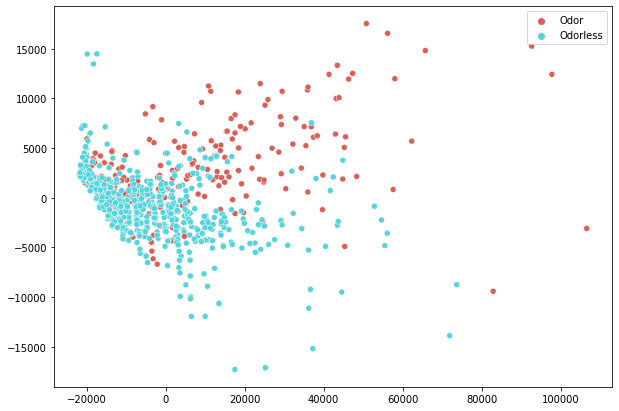

In [3]:
print('Projecting %d-dimensional data to 2D' % X_no_nans.shape[1])

plt.figure(figsize=(10,7))
ax = sns.scatterplot(
    x=pca_result[:,0], y=pca_result[:,1],
    hue=y,
    palette=sns.color_palette("hls", 2)
)
h,l = ax.get_legend_handles_labels()
ax.legend(h, ['Odor', 'Odorless'])
plt.show

Projecting 1203-dimensional data to 3D


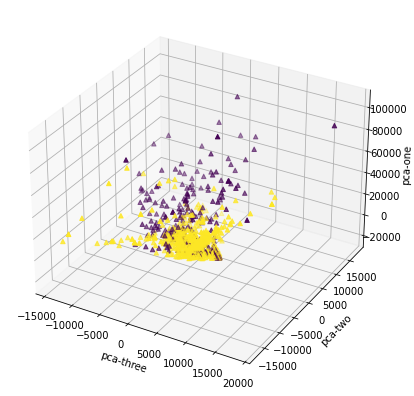

In [4]:
from mpl_toolkits import mplot3d

print('Projecting %d-dimensional data to 3D' % X_no_nans.shape[1])

plt.figure(figsize=(10,7))

ax = plt.axes(projection ="3d")
ax.scatter3D(
    xs=pca_result[:,2], 
    ys=pca_result[:,1], 
    zs=pca_result[:,0], 
    c=y, 
    marker ='^'
    
)

ax.set_xlabel('pca-three')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-one')
plt.show()

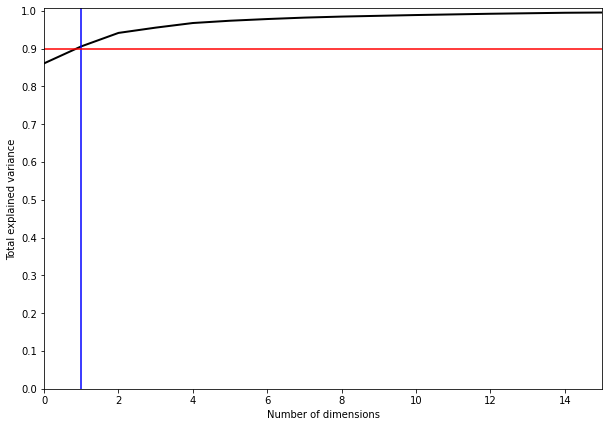

In [5]:
import numpy as np

pca = decomposition.PCA().fit(X_no_nans)
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of dimensions')
plt.ylabel('Total explained variance')
plt.xlim(0, 15)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(1, c='b')
plt.axhline(0.9, c='r')
plt.show();

In [6]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [8.61180215e-01 4.49510917e-02 3.56234148e-02 1.39644819e-02
 1.22310224e-02 6.04978316e-03 4.46742556e-03 3.78174687e-03
 2.72802109e-03 2.16573144e-03 1.91647699e-03 1.79666745e-03
 1.59078159e-03 1.45325373e-03 1.16664869e-03 6.85122333e-04
 5.25879821e-04 5.14294710e-04 3.94973867e-04 3.38257622e-04
 3.32656174e-04 2.70231135e-04 2.52162211e-04 2.06419663e-04
 1.88777889e-04 1.83052043e-04 1.45925361e-04 1.33974974e-04
 1.08132336e-04 8.92609648e-05 7.90976959e-05 6.36485626e-05
 4.68334260e-05 4.36026218e-05 3.74646398e-05 3.13315381e-05
 2.58934975e-05 2.44811746e-05 2.05867482e-05 1.81164701e-05
 1.71776229e-05 1.48769693e-05 1.46965948e-05 1.30489419e-05
 1.14688799e-05 9.85650311e-06 9.38682776e-06 7.98238757e-06
 7.65687669e-06 6.61941544e-06 5.84225116e-06 5.24375752e-06
 4.49908077e-06 4.30820649e-06 3.72004613e-06 3.35156947e-06
 3.10457307e-06 2.73923427e-06 2.47208751e-06 2.34346764e-06
 2.19013210e-06 1.50561361e-06 1.3528503

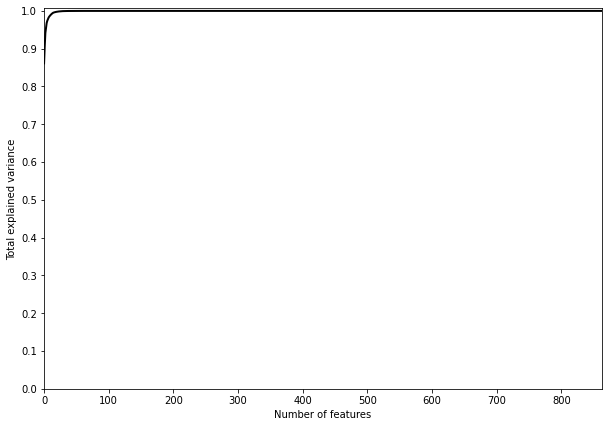

In [7]:
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of features')
plt.ylabel('Total explained variance')
plt.xlim(0, 863)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show();

### TSNE 

Unlike PCA, it's a probabilistic technique rather than probablistic. 

https://builtin.com/data-science/tsne-python

In [8]:
from sklearn.manifold import TSNE
import time

time_start = time.time()
tsne = TSNE(random_state=SEED, n_components=2, verbose=1, n_iter=300)
tsne_results = tsne.fit_transform(X_no_nans)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 865 samples in 0.004s...
[t-SNE] Computed neighbors for 865 samples in 0.364s...
[t-SNE] Computed conditional probabilities for sample 865 / 865
[t-SNE] Mean sigma: 2081.898082
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.323879
[t-SNE] KL divergence after 300 iterations: 0.756091
t-SNE done! Time elapsed: 2.1477649211883545 seconds


<AxesSubplot: >

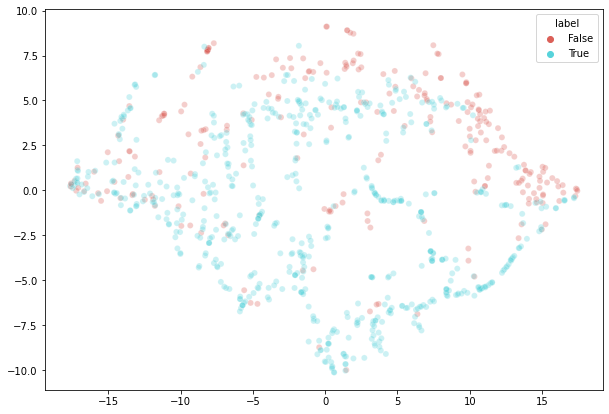

In [9]:
plt.figure(figsize=(10,7))
sns.scatterplot(
    x=tsne_results[:,0], y=tsne_results[:,1],
    hue=y,
    palette=sns.color_palette("hls", 2),
    alpha=0.3
)

In [10]:
pca_5 = decomposition.PCA(n_components=5)
pca_result_5 = pca_5.fit_transform(X_no_nans)

print('Cumulative explained variation for 5 principal components: {}'.format(np.sum(pca_5.explained_variance_ratio_)))

Cumulative explained variation for 5 principal components: 0.9679502258731705


Varying perplexity 5
t-SNE done! Time elapsed: 3.8641483783721924 seconds


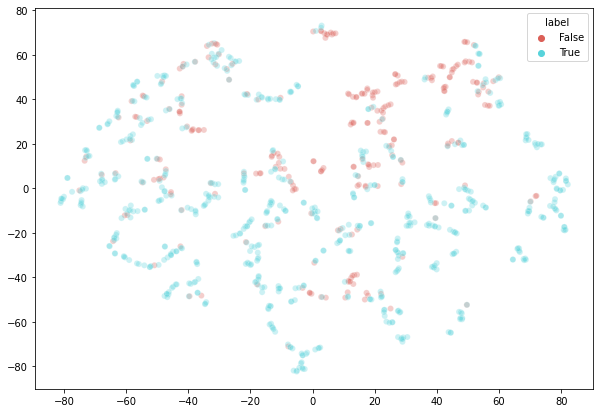

Varying perplexity 10
t-SNE done! Time elapsed: 9.095990657806396 seconds


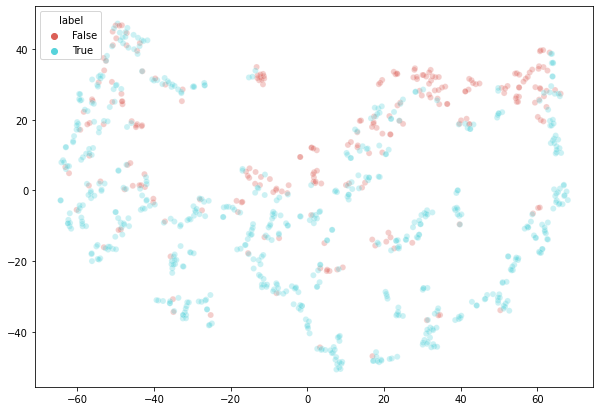

Varying perplexity 15
t-SNE done! Time elapsed: 3.465379238128662 seconds


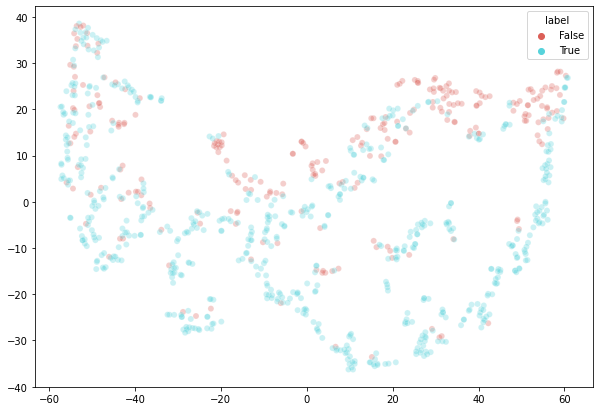

Varying perplexity 20
t-SNE done! Time elapsed: 6.5943498611450195 seconds


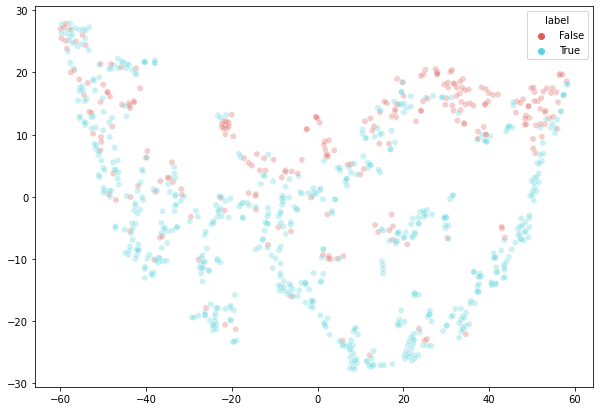

Varying perplexity 25
t-SNE done! Time elapsed: 4.662574052810669 seconds


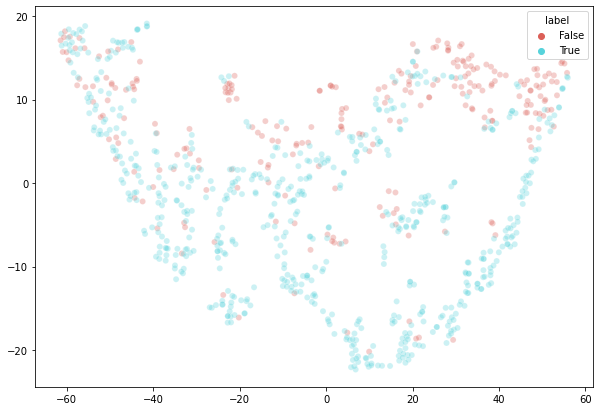

Varying perplexity 30
t-SNE done! Time elapsed: 11.208141803741455 seconds


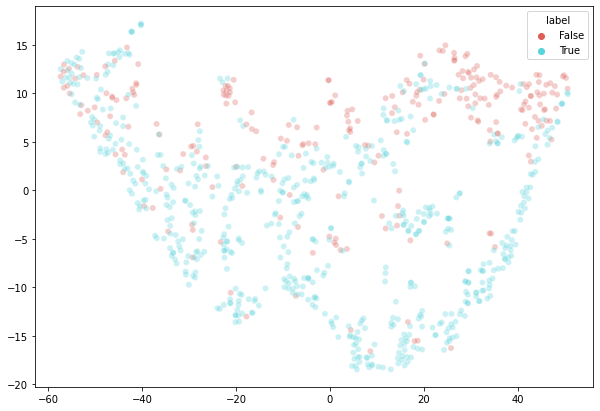

Varying perplexity 35
t-SNE done! Time elapsed: 27.199552536010742 seconds


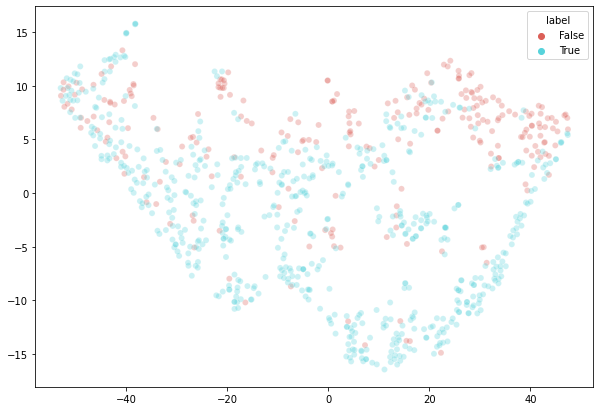

Varying perplexity 40
t-SNE done! Time elapsed: 3.857640027999878 seconds


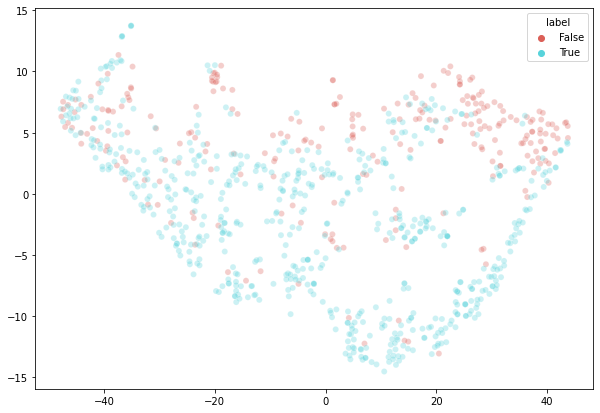

Varying perplexity 45
t-SNE done! Time elapsed: 5.188486814498901 seconds


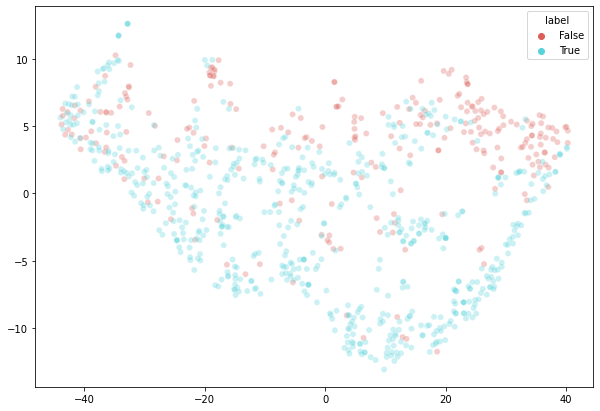

Varying perplexity 50
t-SNE done! Time elapsed: 10.03469204902649 seconds


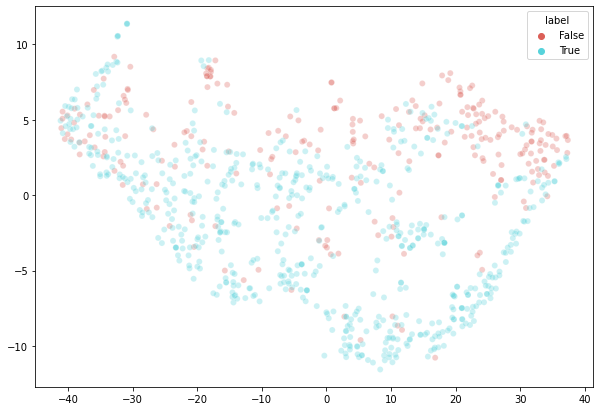

Varying perplexity 55
t-SNE done! Time elapsed: 5.222323417663574 seconds


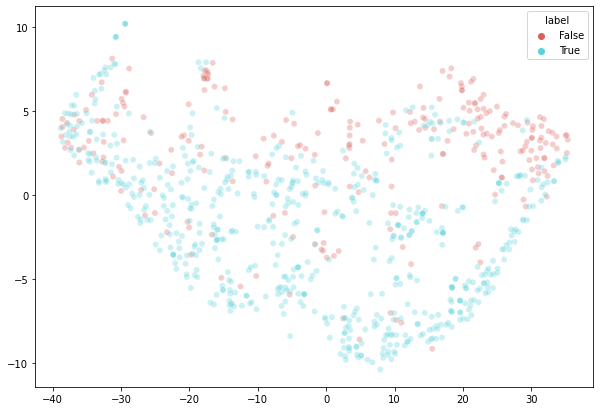

Varying perplexity 60
t-SNE done! Time elapsed: 11.57994294166565 seconds


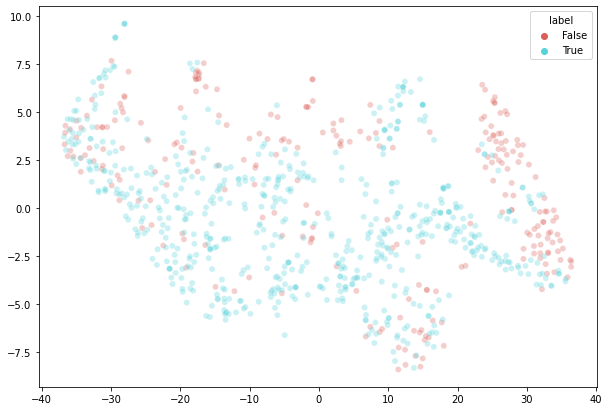

Varying perplexity 65
t-SNE done! Time elapsed: 6.6994030475616455 seconds


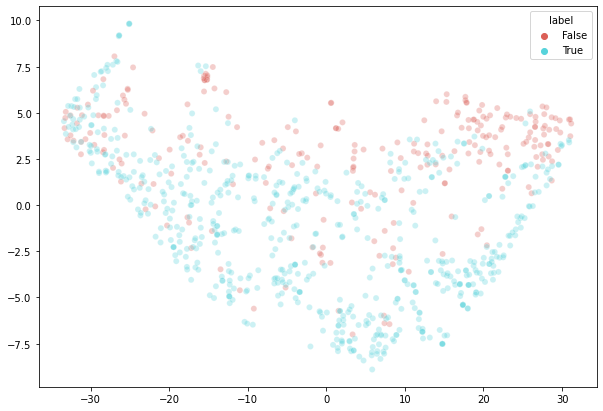

Varying perplexity 70
t-SNE done! Time elapsed: 10.310616254806519 seconds


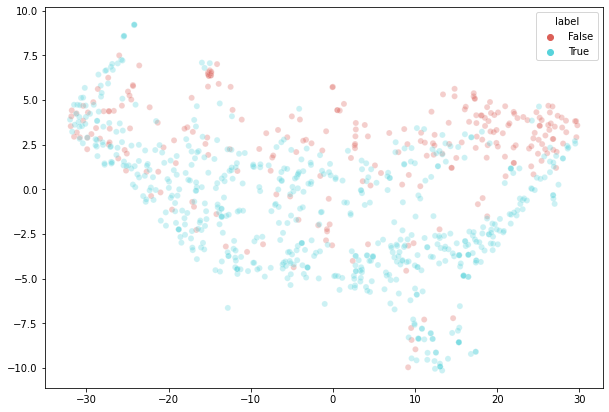

Varying perplexity 75
t-SNE done! Time elapsed: 8.345710039138794 seconds


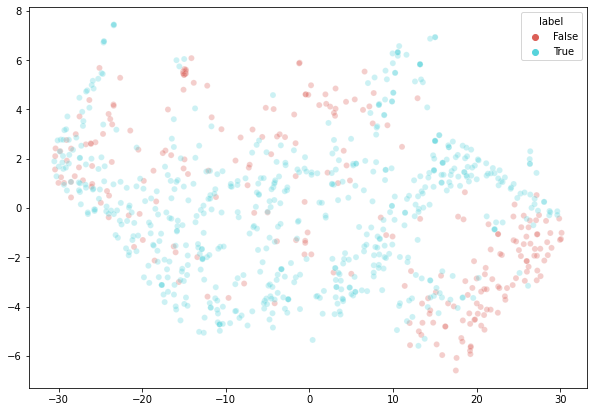

Varying perplexity 80
t-SNE done! Time elapsed: 12.712365627288818 seconds


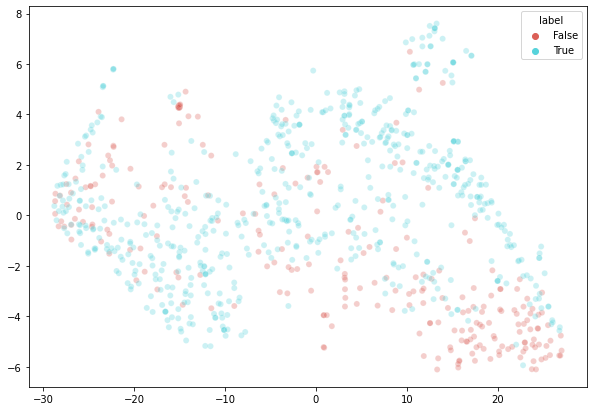

Varying perplexity 85
t-SNE done! Time elapsed: 34.88194298744202 seconds


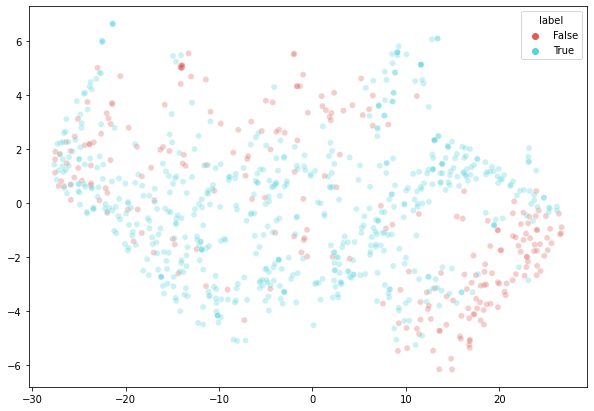

Varying perplexity 90
t-SNE done! Time elapsed: 11.623002767562866 seconds


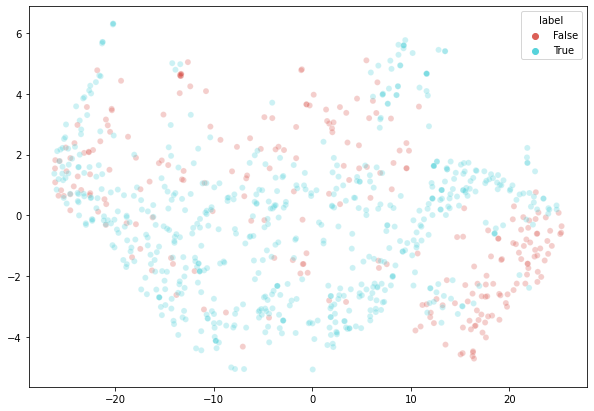

Varying perplexity 95
t-SNE done! Time elapsed: 11.922483444213867 seconds


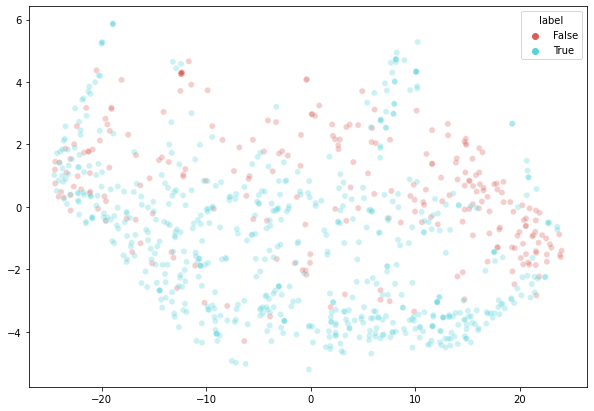

In [11]:
time_start = time.time()

for perpelixity in range(5, 100, 5):
    
    print(f"Varying perplexity {perpelixity}")
    
    time_start = time.time()

    tsne = TSNE(verbose=0, perplexity=perpelixity)
    tsne_pca_results = tsne.fit_transform(pca_result_5)

    print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

    plt.figure(figsize=(10,7))
    sns.scatterplot(
        x=tsne_pca_results[:,0], y=tsne_pca_results[:,1],
        hue=y,
        palette=sns.color_palette("hls", 2),
        alpha=0.3
    )
    plt.show()

### K-Means Clustering

In [12]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(pca_result_5)
data_transformed = mms.transform(pca_result_5)

In [14]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,50)
for k in K:
    km = KMeans(n_init='auto', n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

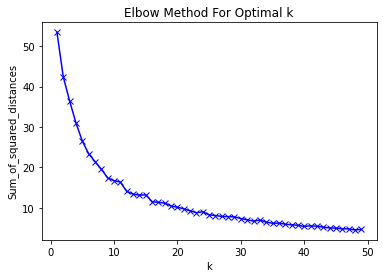

In [15]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [16]:
kmeans = KMeans(n_init="auto", n_clusters=10)
kmeans.fit(pca_result_5)
y_kmeans = kmeans.predict(pca_result_5)

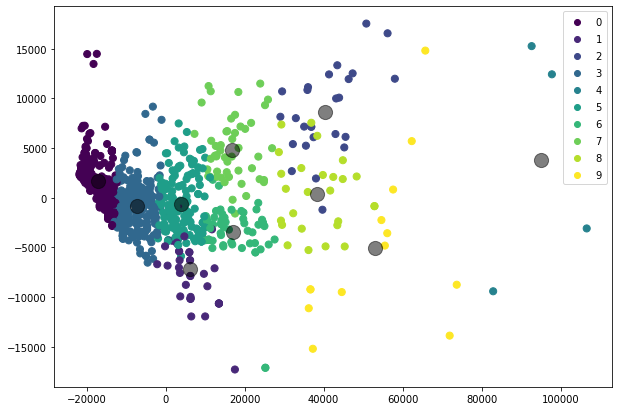

In [17]:
fig, ax1 = plt.subplots(figsize=(10,7))
scatter = ax1.scatter(pca_result_5[:, 0], pca_result_5[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
ax1.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.legend(*scatter.legend_elements())
plt.show()

In [18]:
clusters = pd.DataFrame({'cluster': y_kmeans,
                         'odour':y})

print(clusters.sort_values(by=['cluster']).to_string())

                                                                                            cluster  odour
SMILES                                                                                                    
CCC(=O)O                                                                                          0   True
CC(=O)C1=CC=CS1                                                                                   0   True
C1CCC(=O)C1                                                                                       0   True
C(C(C(F)(F)F)(Cl)Cl)(F)F                                                                          0  False
C(=N)(N)S(=O)O                                                                                    0  False
CC(=O)C1=CC=CO1                                                                                   0   True
C(=C(F)F)(C(F)(F)F)F                                                                              0  False
C                                    

In [19]:
clusters.to_csv('results/10clusters-pca-kmeans.csv')  

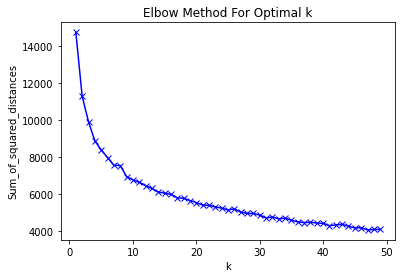

In [20]:
from sklearn.preprocessing import MinMaxScaler

X_clusters = X_no_nans.copy()
mms = MinMaxScaler()
mms.fit(X_clusters)
data_transformed = mms.transform(X_clusters)

Sum_of_squared_distances = []
K = range(1,50)
for k in K:
    km = KMeans(n_init='auto', n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

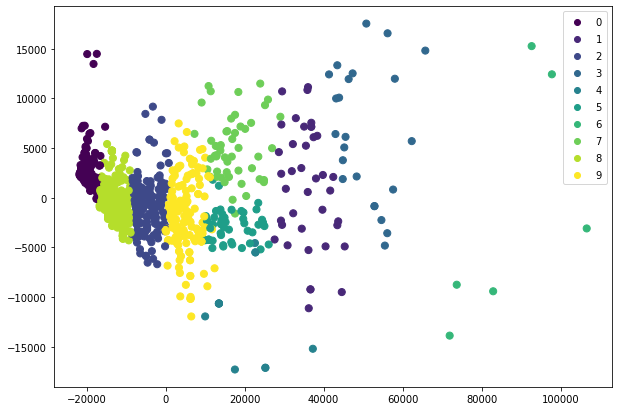

In [21]:
kmeans = KMeans(n_init="auto", n_clusters=10)
kmeans.fit(X_clusters)
y_kmeans = kmeans.predict(X_clusters)

fig, ax1 = plt.subplots(figsize=(10,7))
scatter = ax1.scatter(pca_result_5[:, 0], pca_result_5[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.legend(*scatter.legend_elements())
plt.show()

In [22]:
clusters.to_csv('results/10clusters-kmeans.csv')  